## Import library

In [ ]:
!pip install mlflow dagshub -q
!pip install pyngrok -q
!pip install optuna -q
!pip install efficientnet -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65

In [ ]:
import os

# You can use 'tensorflow', 'torch', or 'jax' as backend
# Make sure to set the environment variable before importing Keras
os.environ["KERAS_BACKEND"] = "tensorflow"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import re
import requests
import csv
import tensorflow as tf
import math
import random


from sklearn.metrics import confusion_matrix,  multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
import efficientnet.keras as efn

from keras.utils import img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Dropout
from keras.callbacks import ModelCheckpoint , EarlyStopping
from keras.utils import Sequence
from keras.layers import Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from keras.models import Model
from keras import layers
from keras import models

## ML flow setup

In [ ]:
from fastapi import FastAPI
import uvicorn
from pyngrok import ngrok
import nest_asyncio
import mlflow
import subprocess

In [ ]:
import dagshub
dagshub.init(repo_owner='kaushigihanml', repo_name='document_classification', mlflow=True)

mlflow.set_experiment("My MLflow Colab Experiment")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=5d945d26-7ca7-46db-aea1-da58474b4de5&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=d03e33851bc8a298581585ccfd90d278745eb7ee9fa3b95051278a4b206fda6e




Accessing as kaushigihanml

Initialized MLflow to track repo "kaushigihanml/document_classification"

Repository kaushigihanml/document_classification initialized!

<Experiment: artifact_location='mlflow-artifacts:/48a3a856a8d74051a9da59bfa3c87666', creation_time=1751119615488, experiment_id='0', last_update_time=1751119615488, lifecycle_stage='active', name='My MLflow Colab Experiment', tags={}>

In [ ]:
import mlflow
import os
from pyngrok import ngrok
from getpass import getpass
from google.colab import userdata

mlflow.set_tracking_uri("https://dagshub.com/kaushigihanml/document_classification.mlflow")



#get_ipython().system_raw("mlflow ui --port 5000 &")
#ngrok.kill()
#mlflow.set_tracking_uri("http://localhost:5000")
#ngrok.set_auth_token(userdata.get('ngrok_key'))
#mlflow_public_url = ngrok.connect(addr="5000", proto="http", bind_tls=True)
#print("MLflow Tracking UI:", mlflow_public_url.public_url)

## Data Ingestion

In [ ]:
import os
import cv2 as cv
import random
from sklearn.model_selection import train_test_split

def get_image_paths(path_to_subset):
  # Collect all valid image paths
  paths = []
  for folder in os.listdir(path_to_subset):
      folder_path = os.path.join(path_to_subset, folder)
      for image in os.listdir(folder_path):
          path_to_image = os.path.join(folder_path, image)

          # Check if image is valid
          img = cv2.imread(path_to_image)
          if img is not None:
              paths.append(path_to_image)
  return paths



In [ ]:
# Define path to dataset and train split size
path_to_subset = '/content/drive/MyDrive/Work_space/Project/text_document_classification/dataset/sample_text_ds/train'
train_size = 0.8
paths=get_image_paths(path_to_subset)
# Split using sklearn
train_paths, val_paths = train_test_split(paths, train_size=train_size, shuffle=True, random_state=42)

print("Training data lenth", len(train_paths))
print("Testing data lenth", len(val_paths))


# Debug print
print("Train sample:", train_paths[0])
print("Test sample:", val_paths[0])


Training data lenth 510
Testing data lenth 128
Train sample: /content/drive/MyDrive/Work_space/Project/text_document_classification/dataset/sample_text_ds/train/note/504211478.jpg
Test sample: /content/drive/MyDrive/Work_space/Project/text_document_classification/dataset/sample_text_ds/train/invoice/87149523_87149526.jpg


In [ ]:
path_to_subset_test = '/content/drive/MyDrive/Work_space/Project/text_document_classification/dataset/sample_text_ds/test'
test_paths=get_image_paths(path_to_subset_test)

print("Test data lenth", len(test_paths))


Test data lenth 73


## Data distribution

/tmp/ipython-input-9-2846203465.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


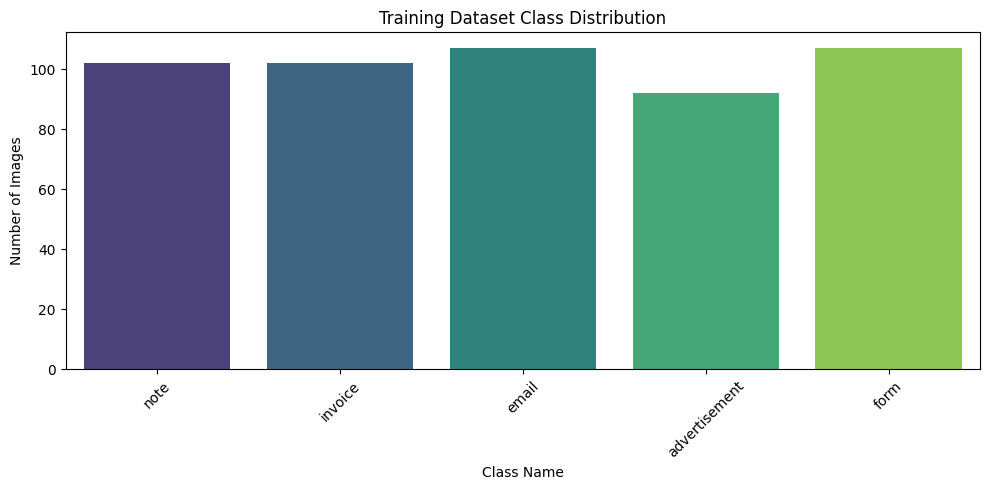

/tmp/ipython-input-9-2846203465.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


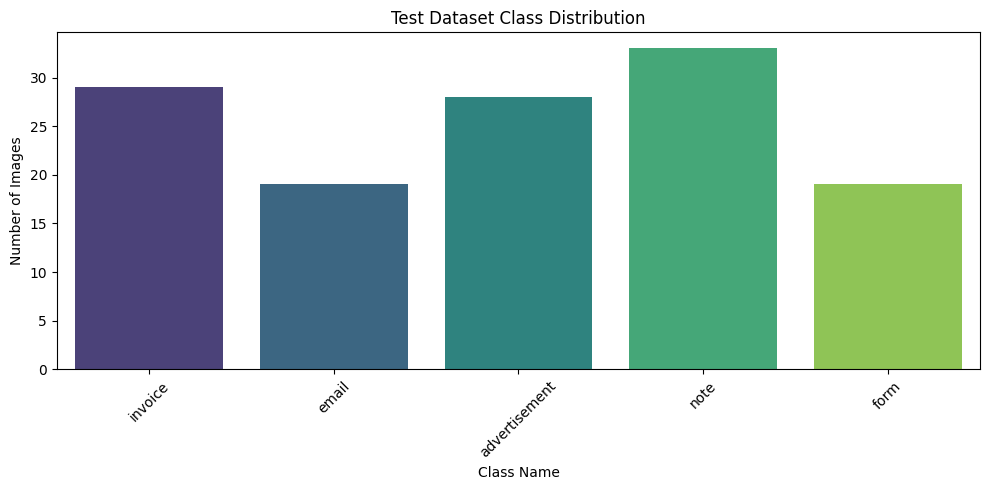

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

def extract_class_names(paths):
    """Extract class names (folder names) from the list of image paths"""
    return [os.path.basename(os.path.dirname(p)) for p in paths]

def plot_class_distribution(paths, title="Class Distribution"):
    class_names = extract_class_names(paths)
    class_counts = Counter(class_names)

    # Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
    plt.title(title)
    plt.xlabel("Class Name")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot training set distribution
plot_class_distribution(train_paths, title="Training Dataset Class Distribution")

# Plot test set distribution
plot_class_distribution(val_paths, title="Test Dataset Class Distribution")


## Data preprocess

In [ ]:

from typing import Tuple, List
import numpy as np
import math
import cv2 as cv
import os
from keras.utils import Sequence
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define global data augmentation generator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

class Dataset(Sequence):
    def __init__(self, paths: List[str], batch_size: int, input_shape: Tuple[int, int, int], augment: bool = False):
        super(Dataset, self).__init__()
        self.batch_size = batch_size
        self.__data = paths
        self.image_size = input_shape
        self.augment = augment

        self.classes = []
        self.label2id = {}
        self.id2label = {}
        self.mlb = None  # MultiLabelBinarizer instance

        self.__labels = self.__list_labels(self.__data)

    def __len__(self):
        return math.ceil(len(self.__data) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.__data[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.__labels[idx * self.batch_size:(idx + 1) * self.batch_size]

        images = np.array([self.__load_image(i) for i in batch_x])
        return images, np.array(batch_y)

    def __list_labels(self, paths: List[str]):
        labels = []
        for path in paths:
            label = path.split(os.path.sep)[-2].split(' ')
            labels.append(label)

        self.mlb = MultiLabelBinarizer()
        labels_bin = self.mlb.fit_transform(labels)
        self.classes = list(self.mlb.classes_)

        # Generate label2id and id2label mappings
        self.label2id = {label: idx for idx, label in enumerate(self.classes)}
        self.id2label = {idx: label for idx, label in enumerate(self.classes)}

        return labels_bin

    """def __load_image(self, path: str):
        img = cv.imread(path)
        img = cv.resize(img, (self.image_size[0], self.image_size[1]))
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        if self.augment:
            img = train_datagen.random_transform(img)

        img = img.astype("float32") / 255.0
        return img"""

    def __load_image(self, path: str):
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (self.image_size[1], self.image_size[0]))  # width, height

        if self.augment:
            img = train_datagen.random_transform(img)

        img = img.astype("float32") / 255.0
        #img = np.reshape(img, self.image_size)  # (height, width, channels)
        return img

## Data visualizing

In [ ]:
input_shape = (400,400, 3)
batch_size = 32

train_dataset = Dataset(train_paths, batch_size=batch_size, input_shape=input_shape, augment=True)
val_dataset = Dataset(val_paths, batch_size=batch_size, input_shape=input_shape, augment=False)

In [ ]:

print(train_dataset.label2id)
print(train_dataset.id2label)
print(train_dataset.mlb)

{'advertisement': 0, 'email': 1, 'form': 2, 'invoice': 3, 'note': 4}
{0: 'advertisement', 1: 'email', 2: 'form', 3: 'invoice', 4: 'note'}
MultiLabelBinarizer()


In [ ]:
train_dataset[0][0].shape

(32, 400, 400, 3)

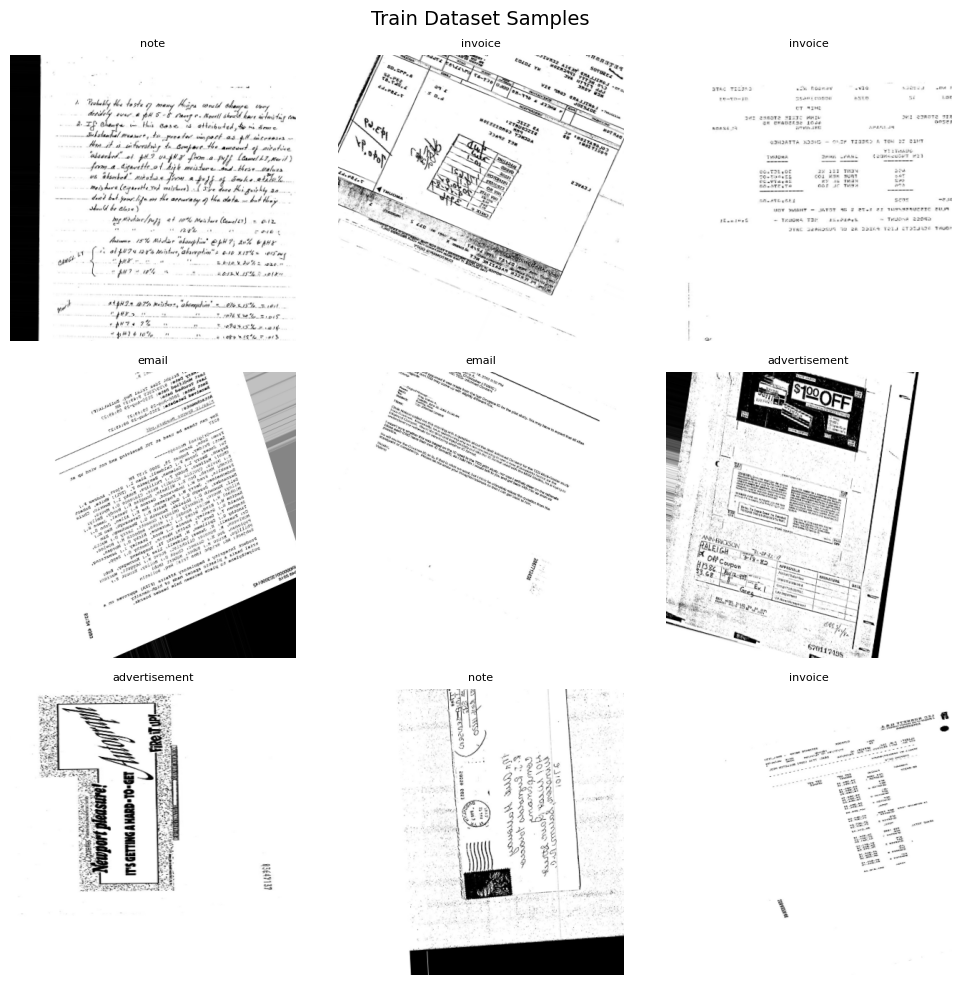

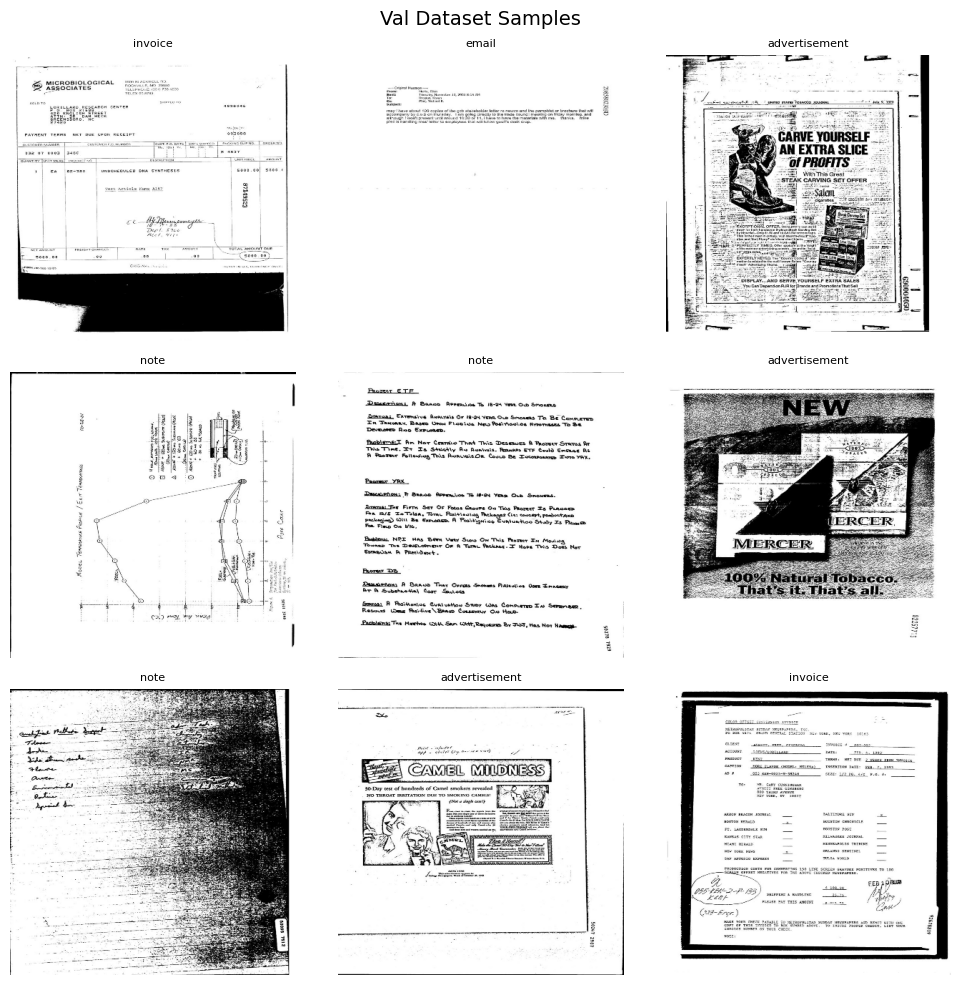

In [ ]:
import matplotlib.pyplot as plt

def show_sample_images(dataset, class_names, title="Sample Images", num_images=9):
    images, labels = dataset[0]  # Get first batch
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        label_indices = np.where(labels[i] == 1)[0]
        label_names = [class_names[j] for j in label_indices]
        plt.title(", ".join(label_names), fontsize=8)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    print("\n")
    print("\n")

# Show sample from train and val
show_sample_images(train_dataset, train_dataset.classes, title="Train Dataset Samples")
show_sample_images(val_dataset, val_dataset.classes, title="Val Dataset Samples")


## model Architecture

In [ ]:
def CNN_model(input_shape,len_class:int):
  model = tf.keras.models.Sequential()

  model.add(Conv2D(32, 3, padding = 'same', input_shape = input_shape, kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization()) #Stack of images become stack with no negative values
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.25))

  model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.25))

  model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Dropout(0.25))

  #model.add(Conv2D(1024, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  #model.add(BatchNormalization())
  #model.add(Conv2D(1024, 2, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
  #model.add(BatchNormalization())
  #model.add(MaxPooling2D())
  #model.add(Dropout(0.25))



  model.add(Flatten())
  model.add(Dense(1024, activation = 'relu', kernel_initializer = 'he_normal', ))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.summary()
  model.add(Dense(len_class, activation = 'softmax'))
  return model

### VGG16

In [ ]:
def VGG16_model(input_shape,len_class:int):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

  # Add custom layers for classification with dropout
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(1024, activation="relu",kernel_initializer = 'he_normal')(x)  # Reduced dense layer size
  x = BatchNormalization()(x)

  x = Dropout(0.5)(x)  # Increased dropout rate

  output = Dense(len_class, activation="softmax")(x)

  # Create the complete model
  model = Model(inputs=base_model.input, outputs=output)

  # Summary of the model
  model.summary()

  return model

## EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

def EfficientNetB0_model(input_shape, len_class: int):
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze base model
    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())  # ✅ Better than Flatten
    model.add(layers.Dense(128, activation='relu', name='dense'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(len_class, activation='softmax', name='predictions'))

    model.summary()
    return model


## Define model checkpoints to save best model

In [ ]:
# Define the directory and filename for saving the best model
model_filename = 'model_cnn.keras'

# Combine the directory and filename
model_path = model_filename


# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

In [ ]:
best_weights = ModelCheckpoint('best_CNN.weights.h5',
                               monitor='val_loss',
                               verbose=0,
                               save_weights_only=True,
                               save_best_only=True,
                               mode='min',
                               save_freq='epoch')


last_weights = ModelCheckpoint('last_CNN.weights.h5',
                               monitor='val_loss',
                               verbose=0,
                               save_weights_only=True,
                               save_best_only=False,
                               mode='auto',
                               save_freq='epoch')

# Define EarlyStopping and ModelCheckpoint callbacks
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       restore_best_weights=True,
                                       verbose=1)

## Define Dataset class instance and compile CNN model

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

input_shape = (224,224, 3)
batch_size=32

train_dataset = Dataset(train_paths, batch_size=batch_size, input_shape=input_shape, augment=True)
val_dataset = Dataset(val_paths, batch_size=batch_size, input_shape=input_shape, augment=False)

len_class=len(train_dataset.classes)

model_CNN = CNN_model(input_shape,len_class)
model_CNN.compile(loss="CategoricalCrossentropy",
             optimizer="adam",
             metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │     3,211,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,212,328 (12.25 MB)

 Trainable params: 3,212,248 (12.25 MB)

 Non-trainable params: 80 (320.00 B)

In [ ]:
#save class
for i in range(len(train_dataset.classes)):
    classes= '\n'.join(train_dataset.classes)

with open('classes.txt', 'w') as f:
    f.write(classes)

#save model architectue as jason format

architecture_json = model_CNN.to_json()

with open('model_architecture_CNN.json', 'w') as json_file:
    json_file.write(architecture_json)


print(train_dataset.classes)

['advertisement', 'email', 'form', 'invoice', 'note']


In [ ]:
import mlflow
import mlflow.tensorflow

# Enable autologging for TensorFlow/Keras
mlflow.tensorflow.autolog()


with tf.device('/GPU:0'):
  history = model_CNN.fit(x=train_dataset,
                      validation_data=val_dataset,
                      epochs = 5,
                      callbacks = [checkpoint,best_weights,early_stopping_callback],
                      verbose = 1)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3571 - loss: 2.2563
Epoch 1: val_loss improved from inf to 8.53139, saving model to model_cnn.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3609 - loss: 2.2344 - val_accuracy: 0.2031 - val_loss: 8.5314
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.5256 - loss: 1.3046
Epoch 2: val_loss did not improve from 8.53139
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 871ms/step - accuracy: 0.5252 - loss: 1.3044 - val_accuracy: 0.1562 - val_loss: 9.5346
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 755ms/step - accuracy: 0.5440 - loss: 1.2695
Epoch 3: val_loss did not improve from 8.53139
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 849ms/step - accuracy: 0.5458 - loss: 1.2687 - val_accuracy: 0.1484 - val_loss: 10.3153
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 743ms/step - accuracy: 0.6049 - loss: 1.0635
Epoch 4: val_loss improved from 8.53139 to 8.45902, saving model to model_cnn.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.

## CNN Training statics

In [ ]:
plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.title("Epoch vs Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='train_loss')
plt.plot(history.history["val_loss"], label='test_loss')
plt.title("Epoch vs Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluation(model, dataset):
    all_true_labels = []
    all_pred_labels = []

    label2id = dataset.label2id
    id2label = dataset.id2label
    class_names = [id2label[i] for i in range(len(id2label))]

    for i in range(len(dataset)):
        images, true_labels = dataset[i]  # batched data

        preds = model.predict(images)  # shape: (batch_size, num_classes)

        # For multi-class (single-label) classification: use argmax
        pred_ids = np.argmax(preds, axis=1)
        true_ids = np.argmax(true_labels, axis=1)

        all_true_labels.extend(true_ids)
        all_pred_labels.extend(pred_ids)

    # Classification report
    report = classification_report(all_true_labels, all_pred_labels, target_names=class_names)
    print(report)

    # Confusion matrix
    cm = confusion_matrix(all_true_labels, all_pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return all_true_labels, all_pred_labels


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
               precision    recall  f1-score   support

advertisement       0.00      0.00      0.00        15
        email       0.00      0.00      0.00        16
         form       0.14      0.91      0.24        11
      invoice       0.00      0.00      0.00        16
         note       0.00      0.00      0.00        15

     accuracy                           0.14        73
    macro avg       0.03      0.18      0.05        73
 weighted avg       0.02      0.14      0.04        73



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


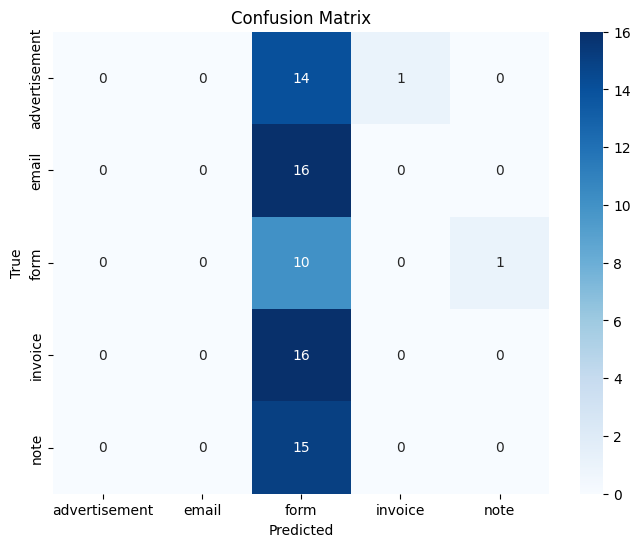

In [ ]:
# Evaluate
real_labels, predicted_labels = evaluation(model_CNN, test_dataset)

## MlFlow

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


def log_training_plots(history, run_id):
    """Log training history plots to MLflow."""

    # Plot training history
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history["loss"], label="Training Loss")
    ax1.plot(history.history["val_loss"], label="Validation Loss")
    ax1.set_title("Model Loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.legend()

    ax2.plot(history.history["accuracy"], label="Training Accuracy")
    ax2.plot(history.history["val_accuracy"], label="Validation Accuracy")
    ax2.set_title("Model Accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.legend()

    plt.tight_layout()
    plt.savefig("training_history.png", dpi=300, bbox_inches="tight")
    mlflow.log_artifact("training_history.png")
    plt.close()


def log_evaluation_metrics(model,dataset):
    """Log comprehensive evaluation metrics."""

    all_true_labels = []
    all_pred_labels = []

    label2id = dataset.label2id
    id2label = dataset.id2label
    class_names = [id2label[i] for i in range(len(id2label))]

    # Get predictions
    for i in range(len(dataset)):
        images, true_labels = dataset[i]  # batched data

        preds = model.predict(images)  # shape: (batch_size, num_classes)

        # For multi-class (single-label) classification: use argmax
        pred_ids = np.argmax(preds, axis=1)
        true_ids = np.argmax(true_labels, axis=1)

        all_true_labels.extend(true_ids)
        all_pred_labels.extend(pred_ids)

    # Confusion matrix
    cm = confusion_matrix(all_true_labels, all_pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # Classification report
    report = classification_report(
        all_true_labels, all_pred_labels, target_names=class_names, output_dict=True
    )

    # Log per-class metrics
    for class_name in class_names:
        if class_name in report:
            mlflow.log_metrics(
                {
                    f"{class_name}_precision": report[class_name]["precision"],
                    f"{class_name}_recall": report[class_name]["recall"],
                    f"{class_name}_f1": report[class_name]["f1-score"],
                }
            )


In [ ]:
def get_or_create_experiment(experiment_name):
  if experiment := mlflow.get_experiment_by_name(experiment_name):
      return experiment.experiment_id
  else:
      return mlflow.create_experiment(experiment_name)

In [ ]:
experiment_id = get_or_create_experiment("Effen")
# Set the current active MLflow experiment
mlflow.set_experiment(experiment_id=experiment_id)

<Experiment: artifact_location='mlflow-artifacts:/f57daf85b5794df2a5ada42449ed6775', creation_time=1751128807774, experiment_id='1', last_update_time=1751128807774, lifecycle_stage='active', name='Effen', tags={}>

In [ ]:
run_name = "first_attempt"

In [ ]:
from tensorflow.keras.optimizers import Adam
from mlflow.models import infer_signature
import keras

# Training parameters
params = {
    "epochs": 5,
    "batch_size":64,
    "learning_rate": 0.001,
    "optimizer": "adam",
    "loss_function": "categorical_crossentropy",
    "dropout_rate": 0.2,
    "hidden_units": [512, 256],
    "input_shape": (224,224, 3)
}

#with mlflow.start_run(nested=True):
with mlflow.start_run(experiment_id=experiment_id, run_name=run_name, nested=True):
    # Log training parameters
    mlflow.log_params(params)

    len_class=len(train_dataset.classes)
    # Create and compile model
    #model = CNN_model(params["input_shape"],len_class)
    #model =VGG16_model(params["input_shape"],len_class)
    model=EfficientNetB0_model(params["input_shape"],len_class)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=params["learning_rate"]),
        loss=params["loss_function"],
        metrics=["accuracy"],
    )



    train_dataset = Dataset(train_paths, batch_size=params["batch_size"], input_shape=params["input_shape"], augment=True)
    val_dataset = Dataset(val_paths, batch_size=params["batch_size"], input_shape=params["input_shape"], augment=False)
    test_dataset = Dataset(test_paths,batch_size=params["batch_size"], input_shape=params["input_shape"], augment=False)


    # Log model architecture
    with open("model_summary.txt", "w") as f:
        model.summary(print_fn=lambda x: f.write(x + "\n"))
    mlflow.log_artifact("model_summary.txt")


    with open("base_model_summary.txt", "w") as f:
        model.summary(print_fn=lambda x: f.write(x + "\n"))
    mlflow.log_artifact("base_model_summary.txt")

    # Log model visualization
    tf.keras.utils.plot_model(model, to_file="model_architecture.png", show_shapes=True)
    mlflow.log_artifact("model_architecture.png")

    # Custom callback for logging metrics
    class MLflowCallback(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs:
                mlflow.log_metrics(
                    {
                        "train_loss": logs.get("loss"),
                        "train_accuracy": logs.get("accuracy"),
                        "val_loss": logs.get("val_loss"),
                        "val_accuracy": logs.get("val_accuracy"),
                    },
                    step=epoch,
                )
    # Prepare sample data for signature inference
    sample_input = train_dataset[0][0]
    sample_predictions = model.predict(sample_input)

    # Infer signature from sample data
    signature = infer_signature(sample_input, sample_predictions)

    # Train model with custom callback
    #history = model.fit(
    #    train_dataset,
    #    batch_size=params["batch_size"],
     #   epochs=params["epochs"],
     #   validation_data=val_dataset,
     #   callbacks=[MLflowCallback(),checkpoint],
     #   verbose=1,
    #)

    # Evaluate model
    #log_training_plots(history, mlflow.active_run().info.run_id)
    log_evaluation_metrics(model,test_dataset)
    #test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    #mlflow.log_metrics({"test_loss": test_loss, "test_accuracy": test_accuracy})

    # Log the trained model
    model.save("my_model.keras")
    #mlflow.keras.log_model(model, name="model",signature=signature)
    #mlflow.keras.log_model(
    #    model,
     #   name="keras_model",
     #   signature=signature,
      #  input_example=sample_input,
      #  registered_model_name="MyKerasHandwrittenDigitRecognizer" # This registers the model
    #)

    mlflow.log_artifact("/content/my_model.keras")
    #print(f"Test accuracy: {test_accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,184 (16.08 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


🏃 View run first_attempt at: https://dagshub.com/kaushigihanml/document_classification.mlflow/#/experiments/1/runs/57bcf9d85179438ea90b2f93d90f278a
🧪 View experiment at: https://dagshub.com/kaushigihanml/document_classification.mlflow/#/experiments/1
